# Preamble

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:85% !important; }</style>"))

import numpy as np
import gridded as gr
import timeseries as ts
import importlib

In [69]:
importlib.reload(gr)
importlib.reload(ts)

<module 'timeseries' from '/mnt/users/staff/mayerj47/budget/timeseries.py'>

# Prepare data

In [3]:
# read data
inffs, DateArr, lats, lons, *_ = gr.ReadData('1985-2019-FS-IMPL-CSCALE-ERA5-DEEPC-F90.grib')

In [4]:
# cut to period
inffs, DateArr = gr.CutToDateRange(inffs, DateArr,'2000-01-15','2019-12-15')

In [5]:
# MaskData
inffs_ocean = gr.MaskData(inffs,lats,lons,pmask='ocean')

In [17]:
# mean over time
inffs_ocean_mean = gr.Compute_MeanOverTime(inffs_ocean, DateArr)

In [12]:
# anomalyclimatology
inffs_ocean_ano, inffs_ocean_clim = gr.Compute_AnomalyClimatology(inffs_ocean, DateArr)

In [13]:
# trend significane -> computationally expensive!
inffs_ocean_ano_trend, inffs_ocean_ano_significance = gr.Compute_TrendSignificance(inffs_ocean_ano,DateArr,ano=True)

In [23]:
gr.CreateDateArray('2019-01-15','2019-12-15')

[datetime.datetime(2019, 1, 15, 0, 0),
 datetime.datetime(2019, 2, 15, 0, 0),
 datetime.datetime(2019, 3, 15, 0, 0),
 datetime.datetime(2019, 4, 15, 0, 0),
 datetime.datetime(2019, 5, 15, 0, 0),
 datetime.datetime(2019, 6, 15, 0, 0),
 datetime.datetime(2019, 7, 15, 0, 0),
 datetime.datetime(2019, 8, 15, 0, 0),
 datetime.datetime(2019, 9, 15, 0, 0),
 datetime.datetime(2019, 10, 15, 0, 0),
 datetime.datetime(2019, 11, 15, 0, 0),
 datetime.datetime(2019, 12, 15, 0, 0)]

# Plot data

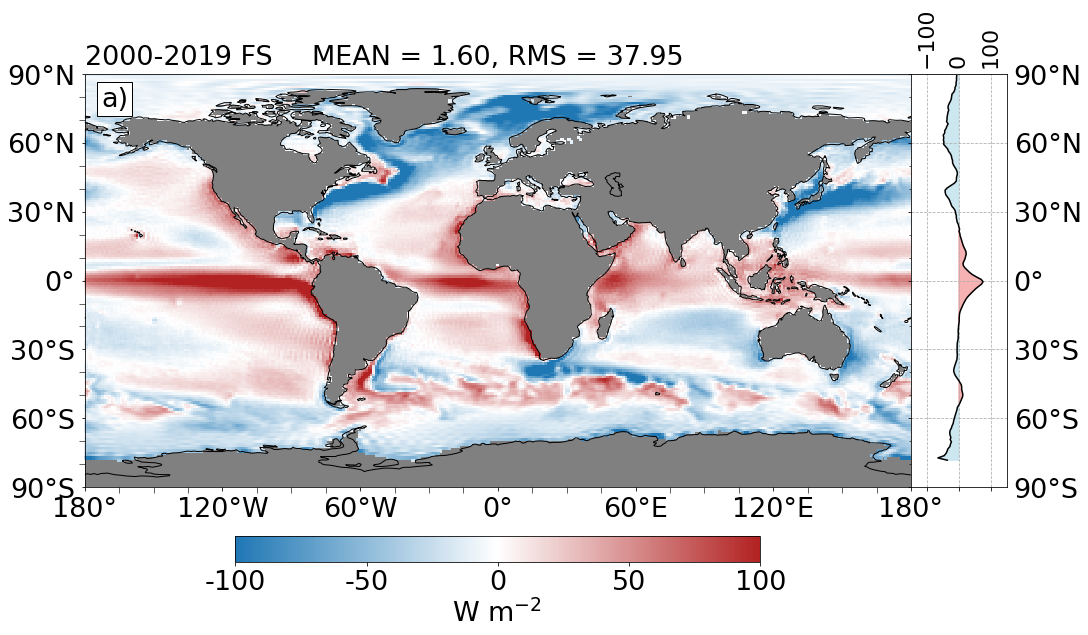

In [59]:
gr.PlotData(inffs_ocean_mean, lats, lons, 'W m**-2', text_corner = 'a)', text_left = '2000-2019 FS', zmmax=150)

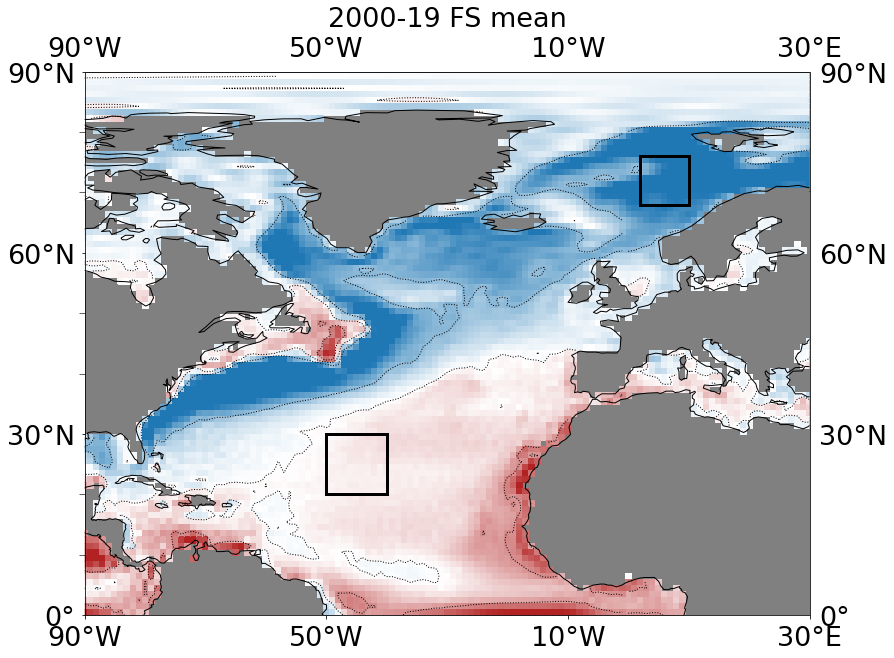

In [60]:
sub = ['00N', '90N', '90W', '30E']
rect = [['76N','68N','2E','10E'],['20N','30N','50W','40W']]

gr.PlotData(inffs_ocean_mean, lats, lons, 'W m**-2', 
            plot_subregion=sub, plot_rect=rect, plot_contour=[-50,0,50], 
            nocbar=True, nozm=True, labelright=True, labeltop=True, text_title='2000-19 FS mean')

 -- Figure saved: ./FS-2000-2019-trend.png


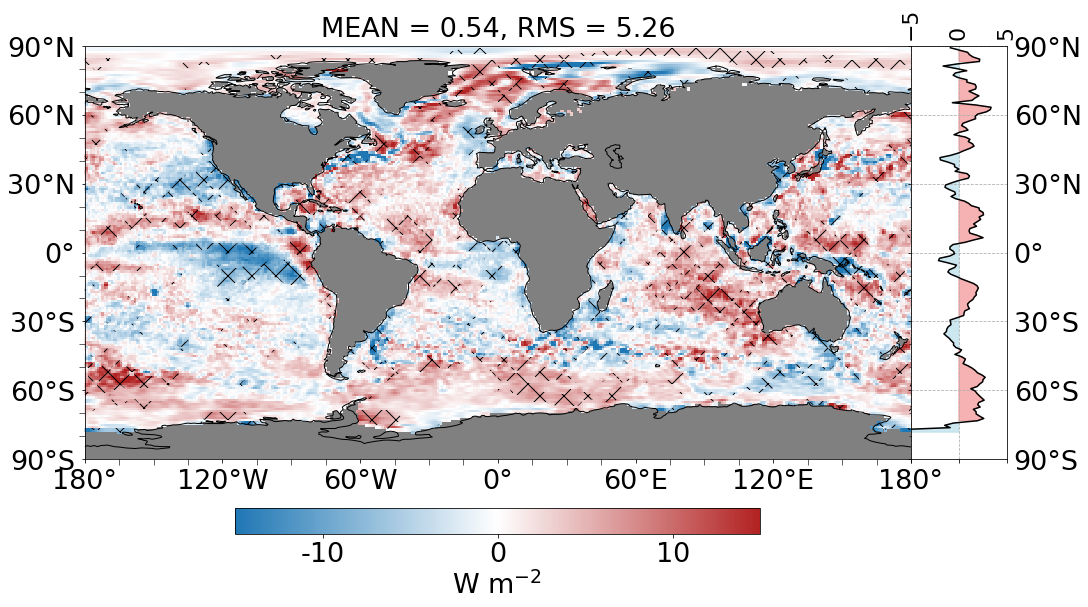

In [30]:
gr.PlotData(inffs_ocean_ano_trend, lats, lons, 'W m**-2', pltrange=[-15,15], zmmax=5, plot_shading=inffs_ocean_ano_significance, savefig='FS-2000-2019-trend.png')

# Prepare timeseries

In [31]:
inffs_ocean_ts = gr.Compute_Statistics(inffs_ocean,lats,lons)[0]

In [32]:
# apply moving average
inffs_ocean_ts_ma = ts.Apply_MovingAverage(inffs_ocean_ts)

In [34]:
# compute confidence intervals
ts.Compute_ConfidenceIntervals(inffs_ocean_ts,DateArr,ano=False)

 -- (t value,t stat., t stat. est.) = (2.0,4.5,4.5)
 --    Confidence intervals = (0.006,0.003)
 -- Alternative estimate CI = (0.006,0.003)


# Trend is significant at CL = 95.0 %.


array([0.00649358, 0.00452193, 0.00255029])

In [53]:
# apply snht
inffs_ocean_tk = ts.Apply_SNHT(inffs_ocean_ts_ma)

In [39]:
# save data
ts.SaveData(DateArr,inffs_ocean_ts,'inffs_ocean_ts.dat')

 -- Save timeseries: ./inffs_ocean_ts.dat


In [44]:
# read data
DateArr_read, inffs_read, _ = ts.ReadData('inffs_ocean_ts.dat')

In [45]:
DateArr_read

[datetime.datetime(2000, 1, 15, 0, 0),
 datetime.datetime(2000, 2, 15, 0, 0),
 datetime.datetime(2000, 3, 15, 0, 0),
 datetime.datetime(2000, 4, 15, 0, 0),
 datetime.datetime(2000, 5, 15, 0, 0),
 datetime.datetime(2000, 6, 15, 0, 0),
 datetime.datetime(2000, 7, 15, 0, 0),
 datetime.datetime(2000, 8, 15, 0, 0),
 datetime.datetime(2000, 9, 15, 0, 0),
 datetime.datetime(2000, 10, 15, 0, 0),
 datetime.datetime(2000, 11, 15, 0, 0),
 datetime.datetime(2000, 12, 15, 0, 0),
 datetime.datetime(2001, 1, 15, 0, 0),
 datetime.datetime(2001, 2, 15, 0, 0),
 datetime.datetime(2001, 3, 15, 0, 0),
 datetime.datetime(2001, 4, 15, 0, 0),
 datetime.datetime(2001, 5, 15, 0, 0),
 datetime.datetime(2001, 6, 15, 0, 0),
 datetime.datetime(2001, 7, 15, 0, 0),
 datetime.datetime(2001, 8, 15, 0, 0),
 datetime.datetime(2001, 9, 15, 0, 0),
 datetime.datetime(2001, 10, 15, 0, 0),
 datetime.datetime(2001, 11, 15, 0, 0),
 datetime.datetime(2001, 12, 15, 0, 0),
 datetime.datetime(2002, 1, 15, 0, 0),
 datetime.datetime(

# Plot timeseries

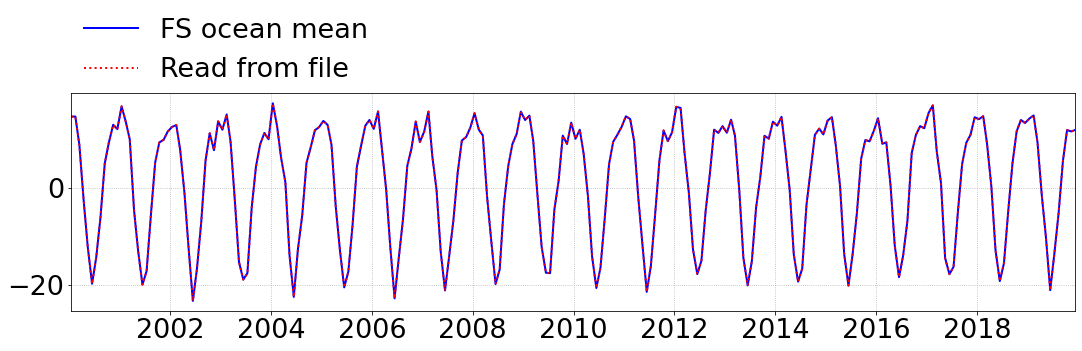

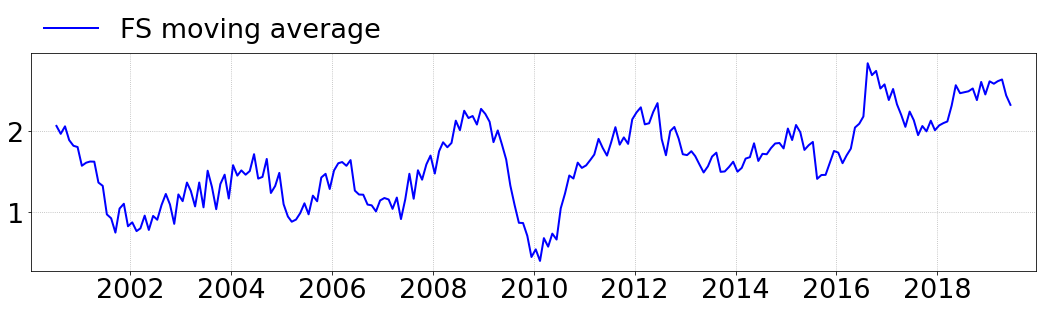

In [51]:
ts.PlotData([DateArr,DateArr_read],[inffs_ocean_ts,inffs_read],['FS ocean mean','Read from file'],ils=['-', ':'])
ts.PlotData([DateArr],[inffs_ocean_ts_ma],['FS moving average'])

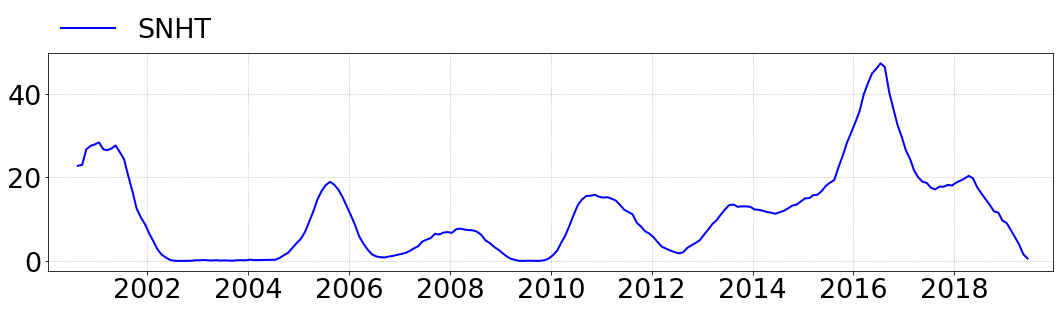

In [54]:
ts.PlotData([DateArr],[inffs_ocean_tk],['SNHT'])

# Documentation

In [62]:
gr.ReadData()

In routine: gridded.py

	Input: 
	 	ifile (str) path to grib or netcdf file
	 	varname (str; optional) only for netcdf; selects the variable if netcdf-file contains multiple variables.
	Output: 
		data, DateArr, lats, lons, gridType, level, mask, units
		
	Notes:
		* GRIB data must be 2- or 3-dimensional, netcdf data can also have more than 3 dimensions.
	


In [70]:
gr.MaskData()

In routine: gridded.py

	This function applies certain types of masks on the data.
	
	Input:
		idata (2D/3D array) input data
		ilats (list of floats) latitudes in degree
		ilons (list of floats) longitudes in degree
		amask (str) area mask, e.g., '00N 90N 90W 30E'
		vmask (str) value mask, first two characters must be alphabetic symbols, e.g., 'gt1e10'
		lmask (str) latitude mask, e.g., '60E', '70N', '40N60S' 
		pmask (str) predefined masks, e.g., 'land', 'ocean',... (see predefined masks in function _DefineMask)
		gridType (str) grid type of the data, can be 'regular_gg' or 'regular_ll'
		
	Output:
		masked_data (same as idata but masked)
		
	Notes:
		lmask:  '60E' is a symmetric mask around the equator where everything north and south of 60° is masked.
			'60N' masks everything north of 60°N.
			'40N60S' masks everything north of 40°N and south of 60°S.
			
		vmask:  Possible arguments are 'ge', 'le', 'gt', 'lt' (greater/less equal/than) + a numeric value, together as string, e.g., 

In [58]:
gr.PlotData()

In routine: gridded.py

	Necessary arguments:
		idata	(2D array) input data with dimensions (nlats,nlons)
		lats	(list of floats) latitudes
		lons	(list of floats) longitudes
		units	(str), '**' will be translated to exponent
		
	Optional arguments:
		pltrange (list of floats) min and max values of the plot 
		zmmax 	 (float) zonal mean maximum (symmetric)
		nozm	 (bool) hide zonal mean plot
		nocbar	 (bool) hide color bar
		cmap	 (matplotlib.colors.LinearSegmentedColormap object) color map
		
		plot_shading   (2D array) plot shading array, dimenions of idata
		plot_subregion (list of str) plot sub-region (e.g., ['00N', '90N', '90W', '30E'])
		plot_vector    (list) draws vectors over the current plot, input is a list with meridional and zonal winds and scale
		plot_rect      (list of lists of str) draws rectangles over given area, e.g., [['76N','68N','2E','10E'],['20N','30N','50W','40W']]
		plot_contour   (list) draws contour lines at given values
		
		text_corner (str) text in the lef